In [1]:
from data_organize import read_ID_file
import matplotlib.pyplot as plt

In [2]:
from data_organize import read_ID_file
import matplotlib.pyplot as plt

In [6]:
qso_spec = read_ID_file('./data/ID_spec_QSO')
star_spec = read_ID_file('./data/ID_spec_star')

In [3]:
with open('./result/mode_4_predict') as f:
    lines = f.readlines()
    qso_predict, star_predict = [], []
    for line in lines:
        line = line.split()
        if int(line[1]) == 0:
            star_predict.append(int(float(line[0])))
        else:
            qso_predict.append(int(float(line[0])))

In [4]:
def read_i_band(ID):
    with open('./data/stripe82candidateVar_v1.1.dat') as f:
        lines = f.readlines()
        i_band = []
        for line in lines[1:]:
            line = line.split()
            if int(float(line[0])) in ID: 
                i_band.append(float(line[4])-float(line[7]))
        return i_band

In [7]:
qso_spec_i_band = read_i_band(qso_spec)
qso_predict_i_band = read_i_band(qso_predict)
star_spec_i_band = read_i_band(star_spec)
star_predict_i_band = read_i_band(star_predict)

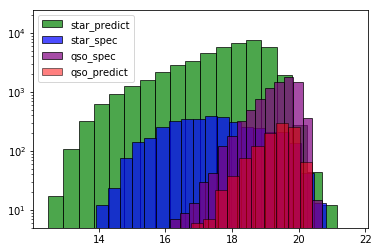

In [21]:
plt.hist(star_predict_i_band, log=True, bins=20, color='green', edgecolor='black', alpha=0.7, label='star_predict')
plt.hist(star_spec_i_band, log=True, bins=20, color='blue', edgecolor='black', alpha=0.7, label='star_spec')
plt.hist(qso_spec_i_band, log=True, bins=20, color='purple', edgecolor='black', alpha=0.7, label='qso_spec')
plt.hist(qso_predict_i_band, log=True, bins=20, color='red', edgecolor='black', alpha=0.5, label='qso_predict')
plt.legend()
plt.ylim(5,24000)
plt.savefig('./result/i_band_plot.png', dpi=2000)